# WeRateDogs - Query Twitter Data
<ul>
<li><a href="#intro">I. - Introduction</a></li>
<li><a href="#gathering">II. - Data Gathering</a></li>
<li><a href="#assessment">III. - Data Assessment</a></li>
<li><a href="#wrangling">IV. - Data Wrangling</a></li>
<li><a href="#eda">V. - Explanatory Analysis</a></li>
<li><a href="#conclusions">VI. - Conclusions</a></li>
<li><a href="#references">VII. - References</a></li>
</ul>

<a id='intro'></a>
## I. - Introduction

During the course of my Udacity "Data Analyst" Nanodegree I analysed Tweets from [WeRateDogs®](https://twitter.com/dog_rates?lang=eng). WeRateDogs® shows off dog picutes in all variations and consider itself as the only source for professional dog ratings. As of March 2020, over 8,7 Mio. twitter accounts follow the supplier of cute doggo pictures.

This report aims to answer simple and important questions of online marketing: 
##### 1. When is the best time for a tweet?
To be precise, we want to analyze if tweets tweeted during the weekend are more popular than tweets during workdays. The same analysis will be done for hours. Since "popularity" is barely quantifiable # of retweets and # of favorites is used instead.

##### 2. Do some breeds outperform others?
Do some breeds receive a significant higher popularity and if so which breed is the most popular?

<a id='gathering'></a>
## II. - Data Gathering

#### II. A.) Importing Packages
The most important packages were imported including Pandas, Numpy and Matplotlib. In addition, the packages Tweepy, Requests and JSON are needed to query data from twitter. Datetime, Random and Image are optional for the project itself.

In [1]:
from IPython.display import Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import random

import tweepy
import requests
import json

#### II. B.) Loading CSV Data
Afterwards, the CSV was loaded into the notebook and I had a first look at the data.

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv', index_col=['tweet_id'], parse_dates=['timestamp','retweeted_status_timestamp'])
df.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Some column names aren't intuitive. Hence, we check their meanings according to the [data dictionary](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object).

**The key takeaways are:**

- in_reply_to_status_id and in_reply_to_user_id are filled when the twee was a reply to another tweet.
- retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp represents the original tweet data in case of a retweet.
- doggo, floofer, pupper and puppo have been added by the UdaCity team but are messy.

#### II. C.) Query Twitter Data

In the next steps, the twitter API was used to gather additional information about each of the given tweets. Therefore Tweepy was used to gather tweet data and write each tweets data into a JSON-file. The correct tweets are identified by their respective tweet id.

In [3]:
access_token = '830139938637303809-iwy5AOTU4MWohNsDXgwB7cFXuQV1l69'
access_secret = 'wVM3G4bK13kEkruNQh8qZAO2Va80c5EKJz2urpemXmtpI'
account_key = 'r4jZ9QQG4IKy6eF4Wk7A2P7tj'
account_secret = '2tQa2YAqvpGnVcQyUKQ4GLk1YOJOZJozDtJbtYIPOfNJjjYO7i'

auth = tweepy.OAuthHandler(account_key, account_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

try:
    api.verify_credentials()
    print("Authentication successful")
except:
    print("Authentication error")

Authentication successful


In the next code cell, tweet data is gathered by Tweepy. In case of an error, the respective tweet id and the error message is written into an CSV. In addition, datetime package was used to measure runtime of the code cell.

In [4]:
#start_date = datetime.datetime.today()

#tweet_data = []
#tweep_errors = []

#id_list = list(df.index)

#for x in id_list:    
#    try:
#        tweet_data.append(api.get_status(x, tweet_mode='extended')._json)
#    except tweepy.TweepError as error:
#        print('Unable to query:', str(x))
#        tweep_errors.append({'id':x, 'error':error})
#        
#print('Summary: '+str(len(tweep_errors))+' Missing Tweets ('+str(round(len(tweep_errors)/len(tweet_data),2))+'%)')
#
#with open('tweet_json.txt', 'w') as x:
#    json.dump(tweet_data, x)
#    
#pd.DataFrame(tweep_errors).to_csv('tweet_errors.csv', index=False)
#    
#print(str('Duration: '+str(datetime.datetime.today() - start_date)))

Unfortunately, there are 25 errors i.e. these tweets are missing when merging datasets, which needs further investigation.

**Before the tweet data can be used, is was necesarry to flatten the JSON-file**, since tweet objeects are stored in nested JSON-files. The respective code snipped was takes from [TowardsDataScience](https://towardsdatascience.com/how-to-flatten-deeply-nested-json-objects-in-non-recursive-elegant-python-55f96533103d).

In [5]:
with open('tweet_json.txt', 'r') as x:
    load_data = json.load(x)

In [6]:
def flatten_json(x):
    out = {}

    def flatten(y, name=''):
        if type(y) is dict:
            for z in y:
                flatten(y[z], name + z + '_')
        elif type(y) is list:
            i = 0
            for z in y:
                flatten(z, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = y

    flatten(x)
    return out

In [7]:
for x in range(len(load_data)):
    load_data[x] = flatten_json(load_data[x])
    
df_add = pd.DataFrame(load_data).set_index('id')
df_add.head()

,created_at,id_str,full_text,truncated,display_text_range_0,display_text_range_1,entities_media_0_id,entities_media_0_id_str,entities_media_0_indices_0,entities_media_0_indices_1,...,place_bounding_box_coordinates_0_3_1,quoted_status_entities_user_mentions_1_screen_name,quoted_status_entities_user_mentions_1_name,quoted_status_entities_user_mentions_1_id,quoted_status_entities_user_mentions_1_id_str,quoted_status_entities_user_mentions_1_indices_0,quoted_status_entities_user_mentions_1_indices_1,quoted_status_entities_hashtags_1_text,quoted_status_entities_hashtags_1_indices_0,quoted_status_entities_hashtags_1_indices_1
id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,0,85,8.924206e+17,892420639486877696,86.0,109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892177421306343426,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,This is Tilly. She's just checking pup on you....,False,0,138,8.921774e+17,892177413194625024,139.0,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891815181378084864,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,0,121,8.918152e+17,891815175371796480,122.0,145.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891689557279858688,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,0,79,8.916896e+17,891689552724799489,80.0,103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891327558926688256,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,This is Franklin. He would like you to stop ca...,False,0,138,8.913276e+17,891327551943041024,139.0,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_add.shape

(2331, 884)

Please note that the diffrence in rows between the two datasets is explained by the 25 errors. 

Since there are 911 columns currently, columns that are not needed for analysis will be dropped.

In [9]:
columns = ['full_text','extended_entities_media_0_media_url_https','source','in_reply_to_status_id','in_reply_to_user_id','user_followers_count','user_favourites_count','retweet_count','favorite_count','retweeted','is_quote_status']

df_add = df_add[columns]
df_add.rename(columns={'full_text':'text','extended_entities_media_0_media_url_https':'expanded_urls'}, inplace=True)

df_add.head()

,text,expanded_urls,source,in_reply_to_status_id,in_reply_to_user_id,user_followers_count,user_favourites_count,retweet_count,favorite_count,retweeted,is_quote_status
id,,,,,,,,,,,
892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8713421,144653,7773,36526,False,False
892177421306343426,This is Tilly. She's just checking pup on you....,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8713421,144653,5760,31473,False,False
891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8713421,144653,3812,23714,False,False
891689557279858688,This is Darla. She commenced a snooze mid meal...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8713421,144653,7942,39858,False,False
891327558926688256,This is Franklin. He would like you to stop ca...,https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8713421,144653,8570,38049,False,False


#### II. D.) Breed Prediction Data

Third source for this project is the image-predictions dataset provided by Udacity in a TSV file.

In [10]:
df_pred = pd.read_csv('image-predictions.tsv', sep='\t', index_col='tweet_id')
df_pred.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
df_pred.shape

(2075, 11)

The dataset looks clean so far, thus it can be joined to the rest of the data. However, the breed prediction dataset has fewer observation compared to the other datasets. Therefore, we need to use a left join when merging to keep track of missing and other errors.

#### II. E.) Merging Data

All three datasets were merged together by a pandas left join. A left join was used for merging since we dont want to loose any information - e.g. an inner join would loose the 25 error tweets. The same is true for dog breed prediction data. Nevertheless, missings have to be imputed in data wrangling chapter. 

In [12]:
df_combined_pre = df.join(df_add, how='left', rsuffix='_add')
df_combined_pre.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,expanded_urls_add,source_add,in_reply_to_status_id_add,in_reply_to_user_id_add,user_followers_count,user_favourites_count,retweet_count,favorite_count,retweeted,is_quote_status
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8713421.0,144653.0,7773.0,36526.0,False,False
892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8713421.0,144653.0,5760.0,31473.0,False,False
891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8713421.0,144653.0,3812.0,23714.0,False,False
891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8713421.0,144653.0,7942.0,39858.0,False,False
891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,...,https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8713421.0,144653.0,8570.0,38049.0,False,False


In [13]:
df_combined_pre_c = df_combined_pre.copy()

df_combined = df_combined_pre_c.join(df_pred, how='left', rsuffix='_pred')
df_combined.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [14]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   in_reply_to_status_id       78 non-null     float64            
 1   in_reply_to_user_id         78 non-null     float64            
 2   timestamp                   2356 non-null   datetime64[ns, UTC]
 3   source                      2356 non-null   object             
 4   text                        2356 non-null   object             
 5   retweeted_status_id         181 non-null    float64            
 6   retweeted_status_user_id    181 non-null    float64            
 7   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 8   expanded_urls               2297 non-null   object             
 9   rating_numerator            2356 non-null   int64              
 10  rating_denominator          2

So far, there seem to be no reason for major concern. However, data quality checks are performed in the next step.

#### II. F.) Data Quality Checks

Last but not least, we checked the quality of the merged dataset by comparing duplicated columns and cheking our errors. 

In [15]:
df_errors = pd.read_csv('tweet_errors.csv')
df_errors

,id,error
0,888202515573088257,"[{'code': 144, 'message': 'No status found wit..."
1,873697596434513921,"[{'code': 144, 'message': 'No status found wit..."
2,872668790621863937,"[{'code': 144, 'message': 'No status found wit..."
3,872261713294495745,"[{'code': 144, 'message': 'No status found wit..."
4,869988702071779329,"[{'code': 144, 'message': 'No status found wit..."
5,866816280283807744,"[{'code': 144, 'message': 'No status found wit..."
6,861769973181624320,"[{'code': 144, 'message': 'No status found wit..."
7,856602993587888130,"[{'code': 144, 'message': 'No status found wit..."
8,851953902622658560,"[{'code': 144, 'message': 'No status found wit..."
9,845459076796616705,"[{'code': 144, 'message': 'No status found wit..."


A check of the errors revealed, that almost all errors occured due to code 144 i.e. the tweets have been deleted. Only one tweet raised an error because my account is not authorized to see the status. Overall, the number of missings is immaterial and will not bias the following analysis.

To check the quality of our first join, text column was used because the column is filled with unique values.

In [16]:
df_combined[df_combined['text'] != df_combined['text_add']].head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
888202515573088257,NaN,NaN,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34+00:00,https://twitter.com/dog_rates/status/887473957...,13,...,2.0,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
873697596434513921,NaN,NaN,2017-06-11 00:25:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24+00:00,https://twitter.com/dog_rates/status/868880397...,14,...,1.0,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
872668790621863937,NaN,NaN,2017-06-08 04:17:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35+00:00,https://twitter.com/loganamnosis/status/872657...,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
872261713294495745,NaN,NaN,2017-06-07 01:19:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/872261713...,13,...,2.0,Labrador_retriever,0.972019,True,flat-coated_retriever,0.008178,True,Chesapeake_Bay_retriever,0.007359,True
869988702071779329,NaN,NaN,2017-05-31 18:47:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57+00:00,https://twitter.com/dog_rates/status/859196978...,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# In case of any mismatch .min() would evaluate to 0 (False)
(df_combined[df_combined['text'] != df_combined['text_add']].index ==  df_errors['id']).min()

True

There is a mismatch in texts but this discrepancy can be fully explained by the 25 errors. Therefore, we conclude that our first join is correct and - more important - that **observations match**.

For evaluation of the second join, expanded_urls_add and jpg_url was used.

In [18]:
# Select mismatches
df_combined[df_combined['expanded_urls_add'] != df_combined['jpg_url']][['expanded_urls_add','jpg_url']].head()

,expanded_urls_add,jpg_url
tweet_id,,
891327558926688256,https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
890729181411237888,https://pbs.twimg.com/media/DFyBag_UQAAhhBC.jpg,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
888554962724278272,https://pbs.twimg.com/media/DFTH_OiUMAE-k4M.jpg,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg
888202515573088257,NaN,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg
887473957103951883,https://pbs.twimg.com/media/DFDw2tsUAAEw7XW.jpg,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg


In [19]:
len(df_combined[df_combined['expanded_urls_add'] != df_combined['jpg_url']])

589

In [20]:
# Select mismatches where only 1 image exists  
df_combined[(df_combined['expanded_urls_add'] != df_combined['jpg_url'])&(df_combined['img_num']==1)][['expanded_urls_add','jpg_url']]

,expanded_urls_add,jpg_url
tweet_id,,
873697596434513921,NaN,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg
851953902622658560,NaN,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg
844704788403113984,NaN,https://pbs.twimg.com/media/C7j-hkSW0AIxCZC.jpg
842892208864923648,NaN,https://pbs.twimg.com/ext_tw_video_thumb/80710...
837366284874571778,NaN,https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg
837012587749474308,NaN,https://pbs.twimg.com/media/C52pYJXWgAA2BEf.jpg
829374341691346946,NaN,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg
802247111496568832,NaN,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg
779123168116150273,NaN,https://pbs.twimg.com/media/CtAAYizW8AAWzBZ.jpg


In [21]:
checklist = df_combined[(df_combined['expanded_urls_add'] != df_combined['jpg_url'])&(df_combined['img_num']==1)].index

# Check if any observations in checlist is at the same time an error
any(x in df_errors.id for y in checklist)

False

The data suggests a mismatch of 589 rows. A closer look reveals that there are two types of mismatches. First, both URL's refer to the same tweet but diffrent pictures - an example is provided below.  Second, "expanded_urls_add" is missing, while jpg_url isn't.

As seen before there can be a marginal mismatch, however 13 mismatches dont give raise to major concern. Therefore, we conclude that overall the join worked and number of mismatches is within a tolerable range.

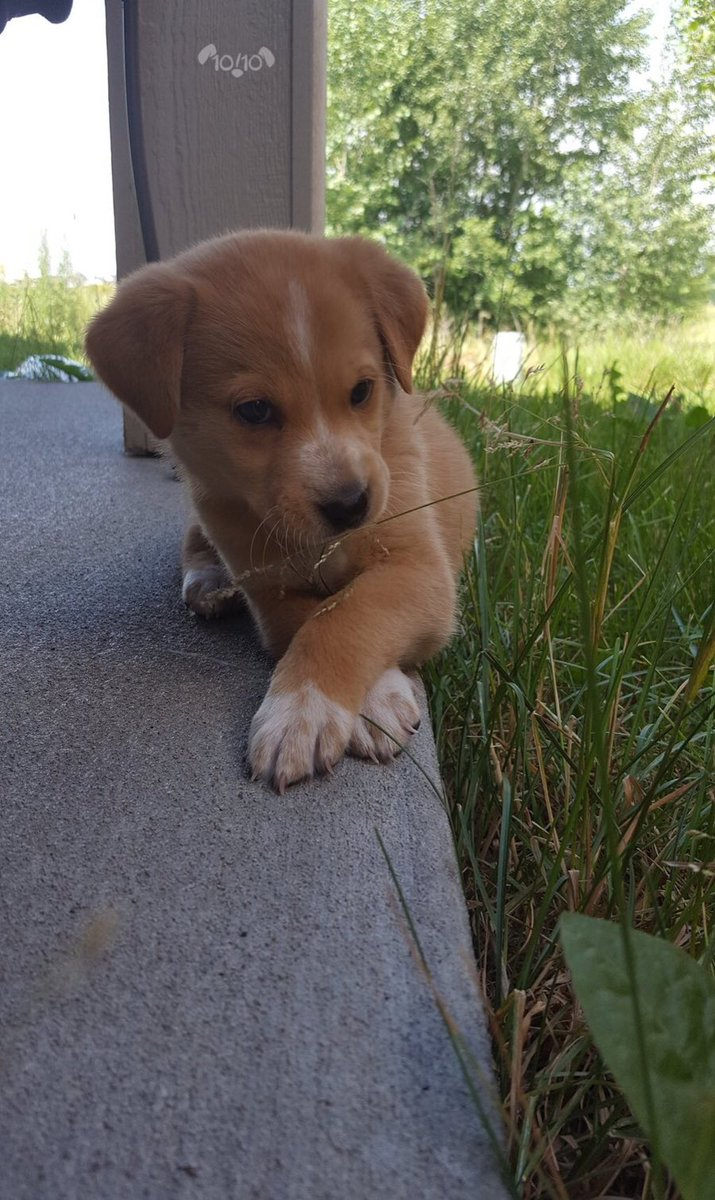

In [22]:
Image(url='https://pbs.twimg.com/media/DFDw2tsUAAEw7XW.jpg', embed=True, width=260, height=260)

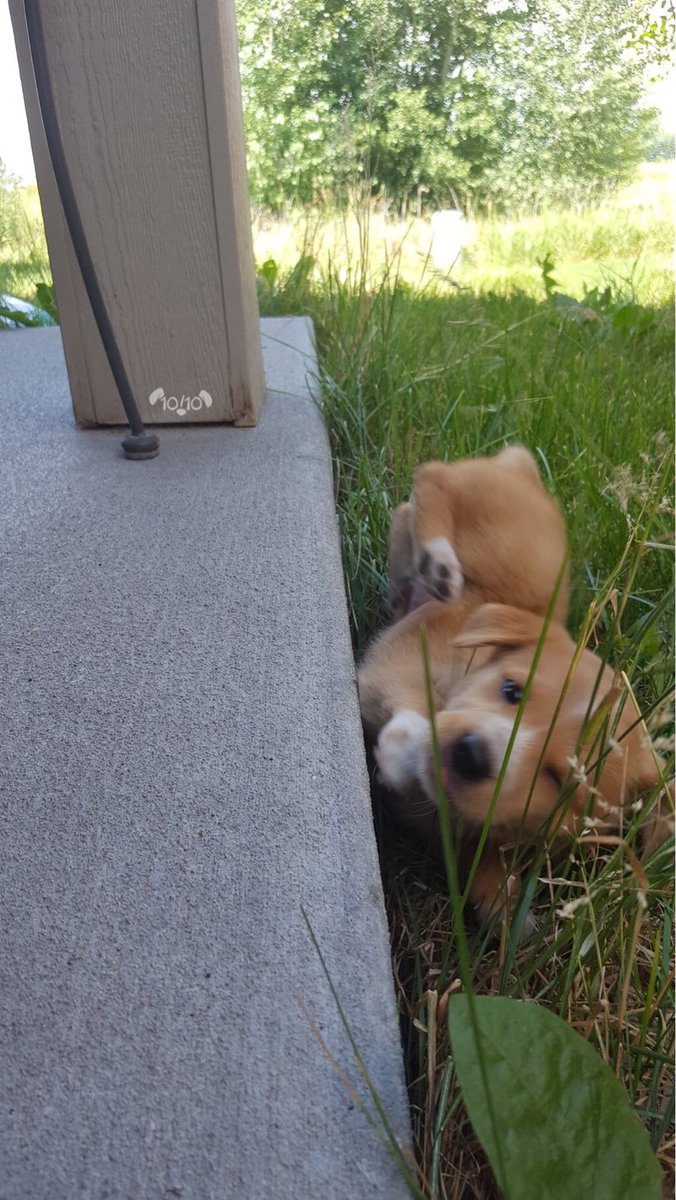

In [23]:
Image(url='https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg', embed=True, width=260, height=260)

<a id='assessment'></a>
## III. - Data Assessment

In [24]:
df_combined.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [25]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   in_reply_to_status_id       78 non-null     float64            
 1   in_reply_to_user_id         78 non-null     float64            
 2   timestamp                   2356 non-null   datetime64[ns, UTC]
 3   source                      2356 non-null   object             
 4   text                        2356 non-null   object             
 5   retweeted_status_id         181 non-null    float64            
 6   retweeted_status_user_id    181 non-null    float64            
 7   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 8   expanded_urls               2297 non-null   object             
 9   rating_numerator            2356 non-null   int64              
 10  rating_denominator          2

In [26]:
df_combined.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,in_reply_to_status_id_add,in_reply_to_user_id_add,user_followers_count,user_favourites_count,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,7.700000e+01,7.700000e+01,2.331000e+03,2331.000000,2331.000000,2331.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433,7.440692e+17,2.040329e+16,8.713470e+06,144653.011154,2730.604891,7633.141141,1.203855,0.594548,1.345886e-01,6.032417e-02
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237,7.524295e+16,1.260797e+17,6.767924e+01,0.105044,4618.372657,11844.076033,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,6.658147e+17,1.185634e+07,8.713421e+06,144653.000000,1.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,6.757073e+17,3.589728e+08,8.713435e+06,144653.000000,552.000000,1333.500000,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,7.032559e+17,4.196984e+09,8.713466e+06,144653.000000,1282.000000,3323.000000,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,8.233264e+17,4.196984e+09,8.713480e+06,144653.000000,3174.500000,9361.500000,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,8.862664e+17,8.405479e+17,8.714082e+06,144654.000000,78583.000000,157858.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


Histogramms were plotted in addition to the describe-command in order to gain a better understanding of the data. The below plots show that retweet count and favorite count are highly skewed. This is not a problem per se but it has to be considered when plotting.

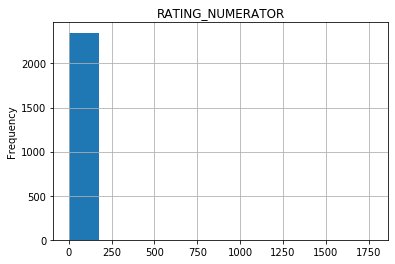

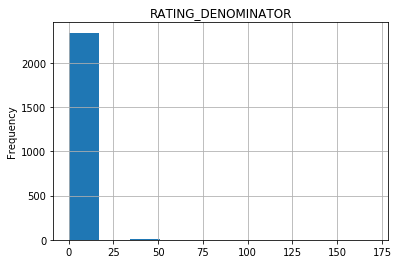

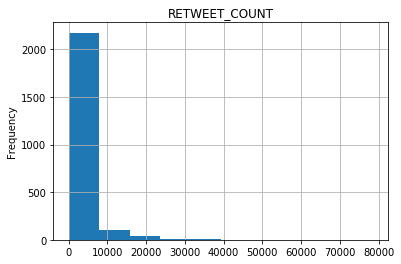

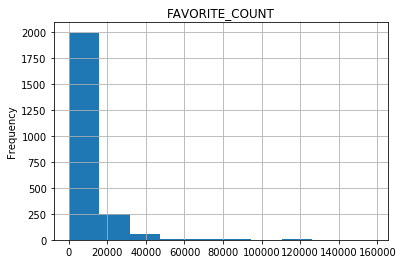

In [27]:
hist_list = ['rating_numerator','rating_denominator','retweet_count','favorite_count']

for x in hist_list:
            df_combined[x].hist();
            plt.title(str(x).upper())
            plt.ylabel('Frequency')
            plt.show()
            plt.clf

In [28]:
# The index was checked instead of the row, since tweets should be unique 
df_combined.index.duplicated().sum()

0

A check for duplicates was done, and shows a negative result i.e. there aren't any duplictated rows.

**Summary**
1. As can be seen, in_reply_to_status_id and in_reply_to_user_id contain mostly missings. The same is true for retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. However, this makes sence, since WeRateDogs® tweets new picutres instead of replies.  Retweets and Replies have to be cleaned, since we only care about original dog ratings.
2. In addition to that, there are some missing URLS's as well as diffrence between expanded_urls (2297), expanded_urls_add (2059) and jpg_url (2075). Hence, further investigation is necessary, although not mandatory because images dont play a major role in our analysis.
3. Dates are formatted as strings instead of datetime objects (Note: this has been fixed by parsing "parse_dates" in the "pd.read_csv"-command)
4. in_reply_to_status_id and in_reply_to_user_id are formatted as floats instead of strings. These columns are filled with numbers but these numbers are unique identifiers. Therefore, they cannot be used for calculation and will be converted to string.
5. retweet_count, favorite_count, user_followers_count and user_favourites_count are formatted as floats instead of integers. For convenience these columns will be converted to integers.
6. The source columns contains full HTML tags. However, the tweet source should be something like "Web" or "Smartphone" - which can be found in between the HTML tags. Hence, the correct information needs to be extracted.
7. Columns doggo, pupper and puppo are reflect the same information, namely age of the dog.
8. rating_denominator can be smaller than 1 and even be 0. This is a problem for calculation of the final rating, since division by 0 will result in and error. In case you divide a number by something between 0 and 1 the result is an multiplication, which doesn't make sense.
9. The final rating is reflected in two columns rating numerator and rating denominator. Since, final rating will be used in the analysis we need to combine both fields, which is related to the previous problem.
10. Due to the left joins there are missing values for retweet_count, favorite_count, user_followers_count and user_favourites_count which have to be imputed. For completeness, please note that retweeted and is_quote_status also contains missing, but these columns are dropped anyways.
11. The same holds true for dog breed predictions. Nonetheless, it might be difficult to replace missing values.
12. All three prediction columns (p1, p2, p3) features dog breeds as well as items.
13. To answer our first question a weekday feature must be calculated.

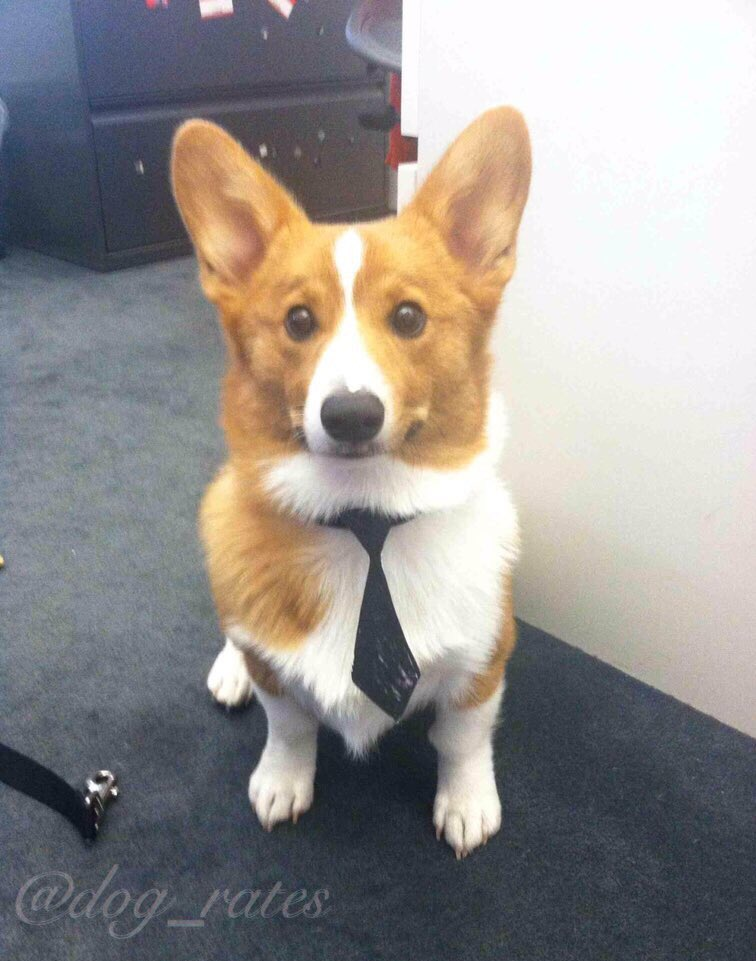

In [204]:
random_dog = random.choice(df_combined[df_combined.expanded_urls_add.notnull()].expanded_urls_add.values)
Image(url=random_dog, embed=True, width=260, height=260)

<a id='wrangling'></a>
## IV. - Data Wrangling

In [30]:
df_combined_c = df_combined.copy()

#### IV. 1.) Retweets and replies

Since we are only interested in original dog rating and no duplicates retweets, replies and quotes will be dropped - since retwees reflect another kind of duplicates, which wasn't not detected by out check.

In [31]:
# Select rows with retweet_status_id
df_combined_clean = df_combined_c.loc[df_combined_c['retweeted_status_id'].isna()==True]
df_combined_clean['retweeted_status_id'].isna().sum()

2175

In [32]:
# Select rows with is_quote_status
df_combined_cleaned = df_combined_clean.loc[df_combined_clean['is_quote_status']==False]
df_combined_cleaned['is_quote_status'].sum()

0

#### IV. 2.) Missing URL's

In [33]:
# Select missings
df_combined_cleaned[df_combined_cleaned['expanded_urls'].isna()]
# Select missings + replies
df_combined_cleaned[(df_combined_cleaned['expanded_urls'].isna())&(df_combined_cleaned['in_reply_to_status_id'].isna())]

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
828361771580813312,NaN,NaN,2017-02-05 21:56:51+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaT,NaN,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
785515384317313025,NaN,NaN,2016-10-10 16:20:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaT,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
696518437233913856,NaN,NaN,2016-02-08 02:18:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaT,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A quick check revealed, that missing URLs are replies.

#### IV. 4.) Formates - Floats to Strings

In [34]:
convert_strings = ['in_reply_to_status_id','in_reply_to_user_id','in_reply_to_status_id_add','in_reply_to_user_id_add','retweeted_status_id','retweeted_status_user_id']

for x in convert_strings:
    df_combined_cleaned[x] =  df_combined_cleaned[x].apply(lambda y: str(y))
    print(str(x)+': '+str(df_combined_cleaned[x].dtype))

in_reply_to_status_id: object
in_reply_to_user_id: object
in_reply_to_status_id_add: object
in_reply_to_user_id_add: object
retweeted_status_id: object
retweeted_status_user_id: object


D:\Dokumente\Anaconda\envs\WeRateDogs\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### IV. 5.) Formates - Floats to Integers

These columns are clearly numeric values that could be used for calcultion.

At the same time median values were imputed for missings, since we already called the correct objects.

In [35]:
convert_ints = ['retweet_count','favorite_count','user_followers_count','user_favourites_count']

for x in convert_ints:
    df_combined_cleaned[x].fillna(df_combined_cleaned[x].median(), inplace=True)
    df_combined_cleaned[x] =  df_combined_cleaned[x].apply(lambda y: int(y))
    print(str(x)+': '+str(df_combined_cleaned[x].dtype))

retweet_count: int64
favorite_count: int64
user_followers_count: int64
user_favourites_count: int64


D:\Dokumente\Anaconda\envs\WeRateDogs\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
D:\Dokumente\Anaconda\envs\WeRateDogs\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### IV. 6.) Source column

Since this column contains full HTML tags, it was decided to split the string by bracktes. Thus, we receive the information between the HTML tags.

In [36]:
df_combined_cleaned['source'] =  df_combined_cleaned['source'].apply(lambda y: y.split('>')[1].split('<')[0])
df_combined_cleaned['source'].unique()

D:\Dokumente\Anaconda\envs\WeRateDogs\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### IV. 7.) Age - doggo, puppo, pupper

As mentioned before, doggo, floofer, pupper and puppo are slang terms for dogs. A dog is mapped to the respective category by age. Hence, the true information in all three columns is the same - age.

Thus we combine the information doggo, puppo and pupper in a new categorical column called age.

Before merging doggo, puppo and pupper it was checked that columns dont overlap.

In [37]:
# Select rows where pupper is true and check wether puppo is empty and vice versa  
(df_combined_cleaned[df_combined_cleaned['pupper']=='pupper'].puppo != 'None').sum() == (df_combined_cleaned[df_combined_cleaned['puppo']=='puppo'].pupper != 'None').sum() == 0

True

In [38]:
# Select rows where pupper is true and check wether doggo is empty and vice versa
(df_combined_cleaned[df_combined_cleaned['pupper']=='pupper'].doggo != 'None').sum() == (df_combined_cleaned[df_combined_cleaned['doggo']=='doggo'].pupper != 'None').sum() == 0

False

In [39]:
df_combined_cleaned[(df_combined_cleaned['pupper']=='pupper')&(df_combined_cleaned['doggo']=='doggo')].head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
817777686764523521,nan,nan,2017-01-07 16:59:28+00:00,Twitter for iPhone,"This is Dido. She's playing the lead role in ""...",nan,nan,NaT,https://twitter.com/dog_rates/status/817777686...,13,...,1.0,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True
808106460588765185,nan,nan,2016-12-12 00:29:28+00:00,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,nan,nan,NaT,https://twitter.com/dog_rates/status/808106460...,12,...,1.0,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True
802265048156610565,7.33109485275861e+17,4196983835.0,2016-11-25 21:37:47+00:00,Twitter for iPhone,"Like doggo, like pupper version 2. Both 11/10 ...",nan,nan,NaT,https://twitter.com/dog_rates/status/802265048...,11,...,1.0,Labrador_retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True
801115127852503040,nan,nan,2016-11-22 17:28:25+00:00,Twitter for iPhone,This is Bones. He's being haunted by another d...,nan,nan,NaT,https://twitter.com/dog_rates/status/801115127...,12,...,1.0,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True
785639753186217984,nan,nan,2016-10-11 00:34:48+00:00,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,nan,nan,NaT,https://twitter.com/dog_rates/status/785639753...,10,...,1.0,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False


In [40]:
# Select rows where doggo is true and check wether puppo is empty and vice versa
(df_combined_cleaned[df_combined_cleaned['doggo']=='doggo'].puppo != 'None').sum() == (df_combined_cleaned[df_combined_cleaned['puppo']=='puppo'].doggo != 'None').sum() == 0

False

Since columns overlap, merging is not feasible.

In [41]:
#df_combined['age'] = 'Unknown'
#age_list = ['pupper','puppo','doggo']
#
#for x in age_list:
#    if x == 'doggo':
#        df_combined.loc[df_combined[x]==x, 'age'] = 'Adult'
#    elif x == 'puppo':
#        df_combined.loc[df_combined[x]==x, 'age'] = 'Juvenile'
#    else:
#        df_combined.loc[df_combined[x]==x, 'age'] = 'Child'
#
#df_combined['age'].value_counts()

A quick look at the texts revealed that the columns floofer, doggo, pupper and puppo are just taken from the text. A short example: In case the text contains the word "pupper" then the column pupper is filled with "pupper". This is problematic for two reasons! First, in case the text contains "pupper" or "puppo" a puppy is not identified as puppy. Second, the text colums often contain diffrent informations, which makes sense because tweets shoudn't look the same.

However, this undermines the trustworthiness of text analysis. As can be seen, the informations contained in the text coulmn are diffrent across tweets.

Therefore, columns were dropped, since the information isn't even needed for our analysis.

In [42]:
df_combined_cleaned.drop(['doggo','pupper','puppo','floofer'], axis=1, inplace=True)

D:\Dokumente\Anaconda\envs\WeRateDogs\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### IV. 8.) Rating denominator

Rating is calculated in the next step. Before calculation, rating denominators were floored at 1 to prevent division by 0 and amplification in case a denominator is between 0 and 1.

In [43]:
df_combined_cleaned.loc[df_combined['rating_denominator']<=0, 'rating_denominator'] = 1
(df_combined_cleaned['rating_denominator']<=0).sum()

D:\Dokumente\Anaconda\envs\WeRateDogs\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0

#### IV. 9.) Final rating

The final dog ratings consist of two elements a numerator and a denominator. Since the denominator can change it would be misleading to compare dogs based on the numerator. In case of a constant denominator there is no diffrence between the final rating and the numerator, since the rank ordering would be the same.

In [44]:
df_combined_cleaned['rating'] = df_combined_cleaned['rating_numerator'] / df_combined_cleaned['rating_denominator']

D:\Dokumente\Anaconda\envs\WeRateDogs\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


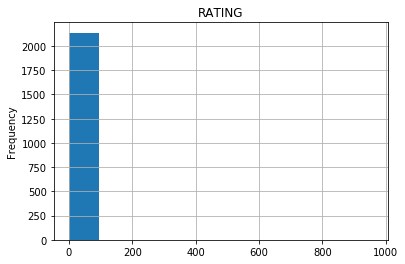

In [45]:
df_combined_cleaned['rating'].hist()
plt.title(str('rating').upper())
plt.ylabel('Frequency')
plt.show()
plt.clf;

In [46]:
len(df_combined_cleaned[df_combined_cleaned['rating']>df_combined_cleaned['rating'].quantile(0.99)])

12

The histogramm above is biased due to 14 outliers with a rating greater than the 99% confidence intervall. Thus, values were capped at the 99% confidence intervall.

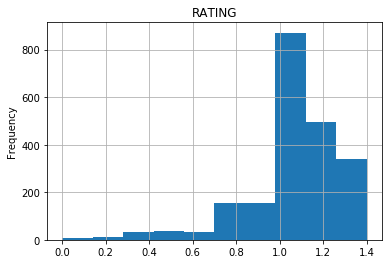

In [47]:
df_combined_cleaned.loc[df_combined_cleaned['rating']>df_combined_cleaned['rating'].quantile(0.99), 'rating'] = df_combined_cleaned['rating'].quantile(0.99)

df_combined_cleaned['rating'].hist()
plt.title(str('rating').upper())
plt.ylabel('Frequency')
plt.show()
plt.clf;

In [48]:
df_combined_cleaned.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

#### IV. 10.) Missing imputation

retweet_count, favorite_count, user_followers_count and user_favourites_count have already been imputed in IV. 5.).

#### IV. 11.) Missing dog breeds

Due to the left join used before, there are missing dog breeds. Nonetheless, it is quite difficult to impute 152 values by median or any other concept, since it's a categorical variable. 

In [49]:
print('Missing ratio: '+str(round(df_combined_cleaned.p1.isna().sum() / len(df_combined_cleaned)*100,2))+'%')

Missing ratio: 7.11%


Unfortunately, there are to many missing to drop them. Therefore, it was decided to keep these observations for the first question, but to omit them for the third question.

#### IV. 12.) Predictions contains items

All three prediction columns (p1, p2, p3) features dog breeds as well as items.

#### IV. 13.) Weekday feature

To anser our first question it is important to know the exact weekday of a tweet.

In [94]:
df_combined_cleaned['weekday'] = df_combined_cleaned['timestamp'].apply(lambda x: x.date().weekday()+1)
df_combined_cleaned['weekday']

D:\Dokumente\Anaconda\envs\WeRateDogs\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


tweet_id
892420643555336193    2
892177421306343426    2
891815181378084864    1
891689557279858688    7
891327558926688256    6
                     ..
666049248165822465    1
666044226329800704    1
666033412701032449    7
666029285002620928    7
666020888022790149    7
Name: weekday, Length: 2139, dtype: int64

**Summary:**

Overall, problems were solved. However, some features will not be used in the final analysis, since their use might lead to unreliable results due to marginal data. 

Finally, columns related to retweets, quotes and replies can therefore be dropped. In addition, columns that will not be used e.g. img_num in the analysis are dropped as well columns used for quality checks - expanded_urls_add is preferred over jpg_url, due to less missings.

In [89]:
df_combined_cleaned.drop(['in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','text_add','source_add','in_reply_to_status_id_add','in_reply_to_user_id_add','retweeted','is_quote_status','img_num','jpg_url'], axis=1, inplace=True)

KeyError: "['in_reply_to_user_id' 'retweeted_status_id' 'retweeted_status_user_id'\n 'retweeted_status_timestamp' 'text_add' 'source_add'\n 'in_reply_to_status_id_add' 'in_reply_to_user_id_add' 'retweeted'\n 'is_quote_status' 'img_num' 'jpg_url'] not found in axis"

In [101]:
df_combined_cleaned.to_csv('cleaned_data.csv', index=True)

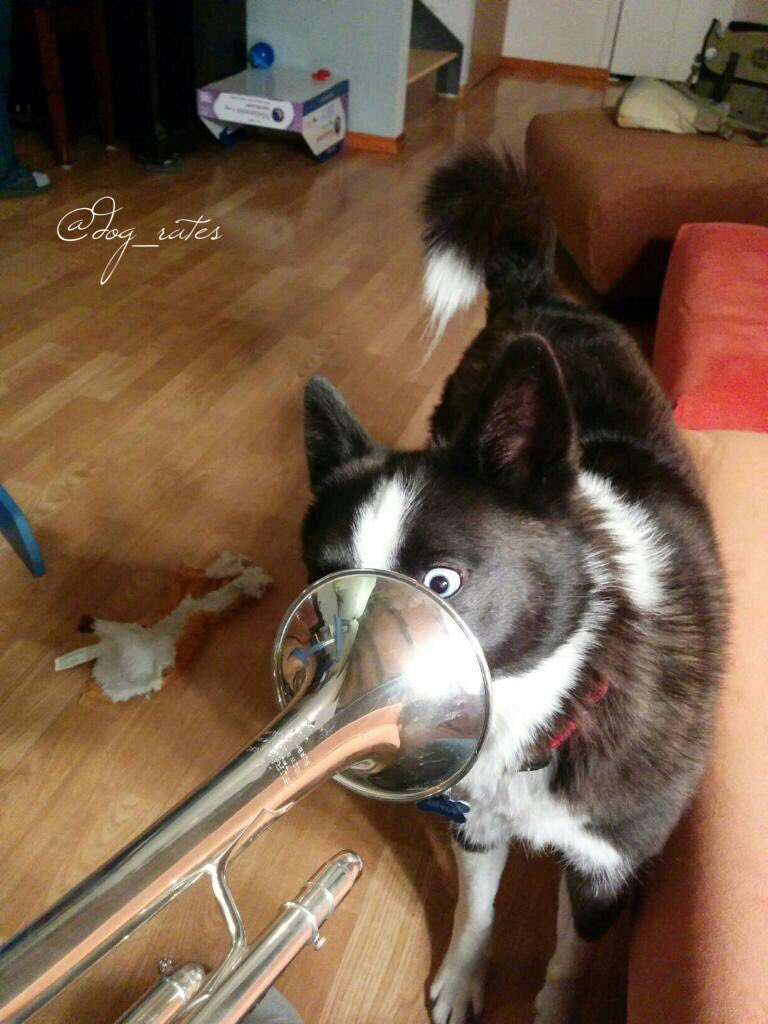

In [205]:
random_dog = random.choice(df_combined[df_combined.expanded_urls_add.notnull()].expanded_urls_add.values)
Image(url=random_dog, embed=True, width=260, height=260)

<a id='eda'></a>
## V. - Explanatory Analysis

WeRateDogs® is a popular twitter blog, which tweets on a daily basis. A very important question for each blogger is: What drives my popularity?

In the following analysis we want to dive into the number and answer simple but important questions. Popularity is measured by number of favorites or - more important - number of retweets. [Why are retweets more important?](https://medium.com/@Encore/favorites-vs-retweets-and-why-one-is-more-important-than-the-other-ba12ee20e9ba) For these reasons we will focus on number of retweets in this analysis.


##### 1. When is the best time for a tweet?
To be precise, we want to analyze if tweets tweeted during the weekend are more popular than tweets during workdays. The same analysis will be done for hours. Since "popularity" is barely quantifiable # of retweets and # of favorites is used instead.

##### 2. Do some breeds outperform others?
Do some breeds receive a significant higher popularity and if so which breed is the most popular?

In [102]:
df_analysis = pd.read_csv('cleaned_data.csv', index_col=['tweet_id'], parse_dates=['timestamp'])

##### 1. When is the best time for a tweet?

In order to answer our first question, line plots were drawn below. The plots show the weekdays on their x-axis, starting with Monday (1), till Sunday (7). The number of tweets is plotted on the y-axis.

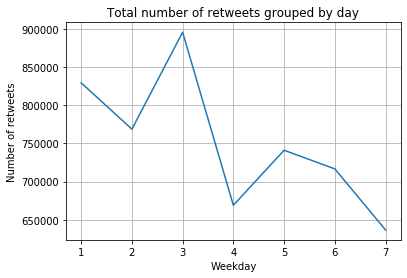

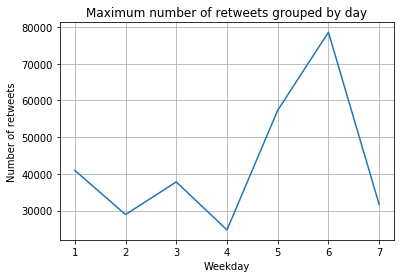

In [151]:
aggr_weekday_sum = df_analysis.groupby('weekday').retweet_count.sum()

aggr_weekday_sum.plot();
plt.grid(which='major', axis='both')
plt.title('Total number of retweets grouped by day')
plt.ylabel('Number of retweets')
plt.xlabel('Weekday')
plt.show()
plt.clf;

aggr_weekday_max = df_analysis.groupby('weekday').retweet_count.max()

aggr_weekday_max.plot();
plt.grid(which='major', axis='both')
plt.title('Maximum number of retweets grouped by day')
plt.ylabel('Number of retweets')
plt.xlabel('Weekday')
plt.show()
plt.clf;

By looking at the first plot, we see that the best day for tweeting is Wednesday, followed by Monday. This is interesting because my first guess would have been saturday, since people have more free time compared to working days. On the other hand, Saturday is the day most popular tweet overall, as can be seen in the second plot. Hence, we checked the retweet volatility in the next two plots,to validate these result.

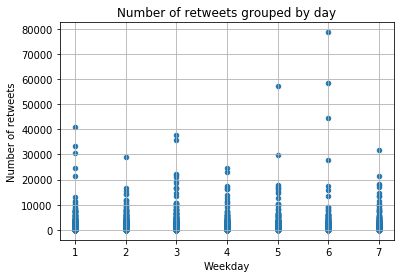

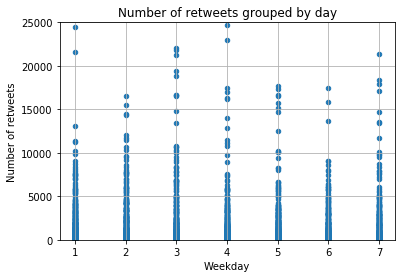

In [179]:
df_analysis.plot.scatter(x='weekday', y='retweet_count')
plt.grid(which='major', axis='both')
plt.title('Number of retweets grouped by day')
plt.ylabel('Number of retweets')
plt.xlabel('Weekday')
plt.show()
plt.clf;

df_analysis.plot.scatter(x='weekday', y='retweet_count')
plt.grid(which='major', axis='both')
plt.title('Number of retweets grouped by day')
plt.ylabel('Number of retweets')
plt.xlabel('Weekday')
plt.ylim([0,25000])
plt.show()
plt.clf;

The first plot suggests that volatility decreases. However, if we remove outliers the story is diffrent. In the second plot we see that tweets during weekdays perform better than tweets during weekends. Moreover, volatility seems to be almost constant.

**To check the results, an A|B test was performed.**

In [184]:
weekday_df = []

for _ in range(10000):
    weekday_df.append({'weekdays':df_analysis.sample(2500, replace=True).query('weekday<6').retweet_count.mean(),
               'weekends':df_analysis.sample(2500, replace=True).query('weekday>5').retweet_count.mean(),
               'mean_diff':df_analysis.sample(2500, replace=True).query('weekday<6').retweet_count.mean() - df_analysis.sample(2500, replace=True).query('weekday>5').retweet_count.mean()})
    
weekday_df = pd.DataFrame(weekday_df)

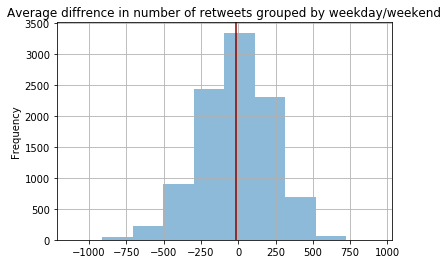

Mean diffrence: -15.590203619718997


In [203]:
plt.hist(weekday_df['mean_diff'], alpha = 0.5, label='weekdays')
plt.axvline(weekday_df['mean_diff'].mean(), color='darkred')

plt.title('Average diffrence in number of retweets grouped by weekday/weekend')
plt.xlabel=('Average number of retweets')
plt.ylabel('Frequency')
plt.grid(True, which='major', axis='both')

plt.show()

print('Mean diffrence: '+str(weekday_df['mean_diff'].mean()))

The A|B test contradicts our previous results and shows that there is no statistical significant diffrence in number of retweets - and by far no practical significance. Thus, we conclude that the day doens't matter when tweeting. **It seems like tweets spread over time, an information not covered in our analysis - future research has to proove this hypothesis.**

##### 2. Do some breeds outperform others?
Is there a dog breed, which is more popular in general and lead to more popular tweets. This question is answered by the following bar plot, which shows the total number of retweets per breed for the five most popular breeds.



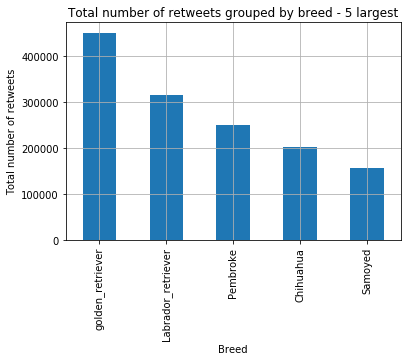

In [177]:
aggr_pred = df_analysis.groupby('p1').retweet_count.sum().nlargest(5)

aggr_pred.plot.bar();
plt.grid(which='major', axis='both')
plt.title('Total number of retweets grouped by breed - 5 largest')
plt.ylabel('Total number of retweets')
plt.xlabel('Breed')
plt.show()
plt.clf;

**The most popular breeds are:**

| Rank | Dog breed |
| :--- | :--- |
| 1 | Golden Retriever |
| 2 | Labrador Retriever |
| 3 | Welsh Corgi Pembroke |
| 4 | Chihuahua |
| 5 | Samoyed |

**Our data supports the cliche of the dolgen retriever as the most popular breed.** Thus, we conclude that tweets featuring golden retriever are more likely to get retweeted and become more popular. Nevertheless, it is wrong for WeRateDogs® to tweet golden retrievers only. What makes a blog interesting in the long run is change and diversity. But every now and then WeRateDogs® should think about tweeting golden retrievers.

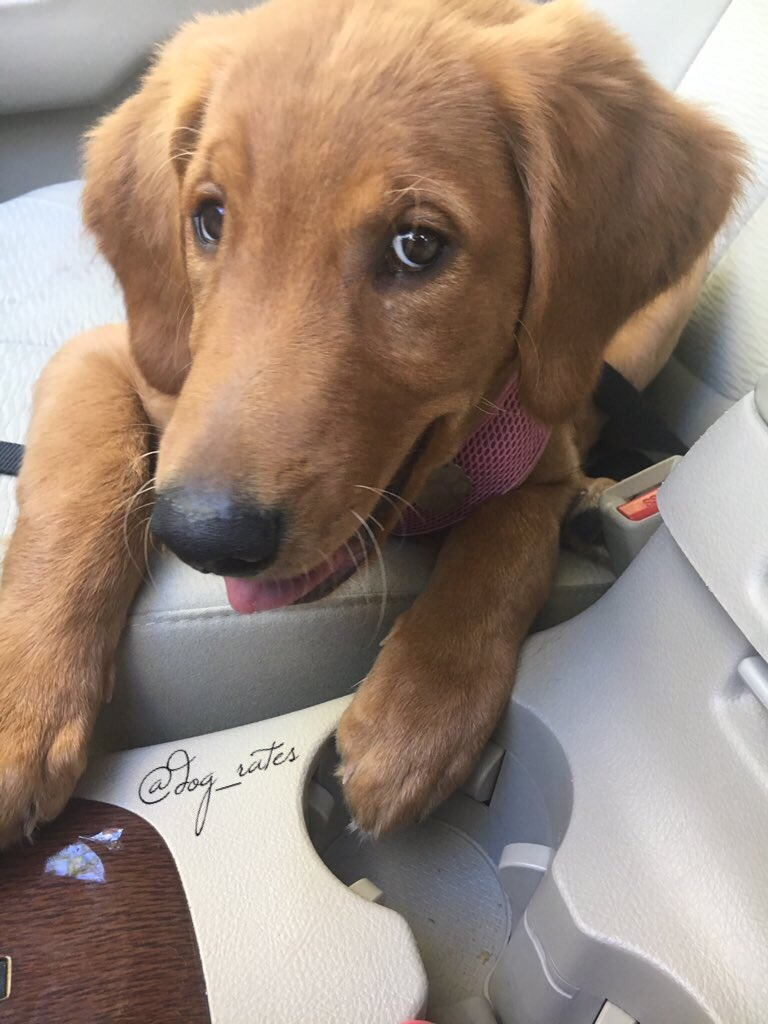

In [233]:
golden_retriever = df_analysis[df_analysis['p1']=='golden_retriever']

random_retriever = random.choice(golden_retriever[golden_retriever.expanded_urls_add.notnull()].expanded_urls_add.values)
Image(url=random_retriever, embed=True, width=260, height=260)

<a id='conclusions'></a>
## VI. - Conclusions

The above analysis made three points clear:

**1. There is no significant diffrence between tweeting during working week or tweeting during the weekend.**

**2. Tweets featuring Golden Retriever perform on average better than tweets featuring other breeds.**

**3. However, every blog should offer diversity - every now and then a golden retriever!** 

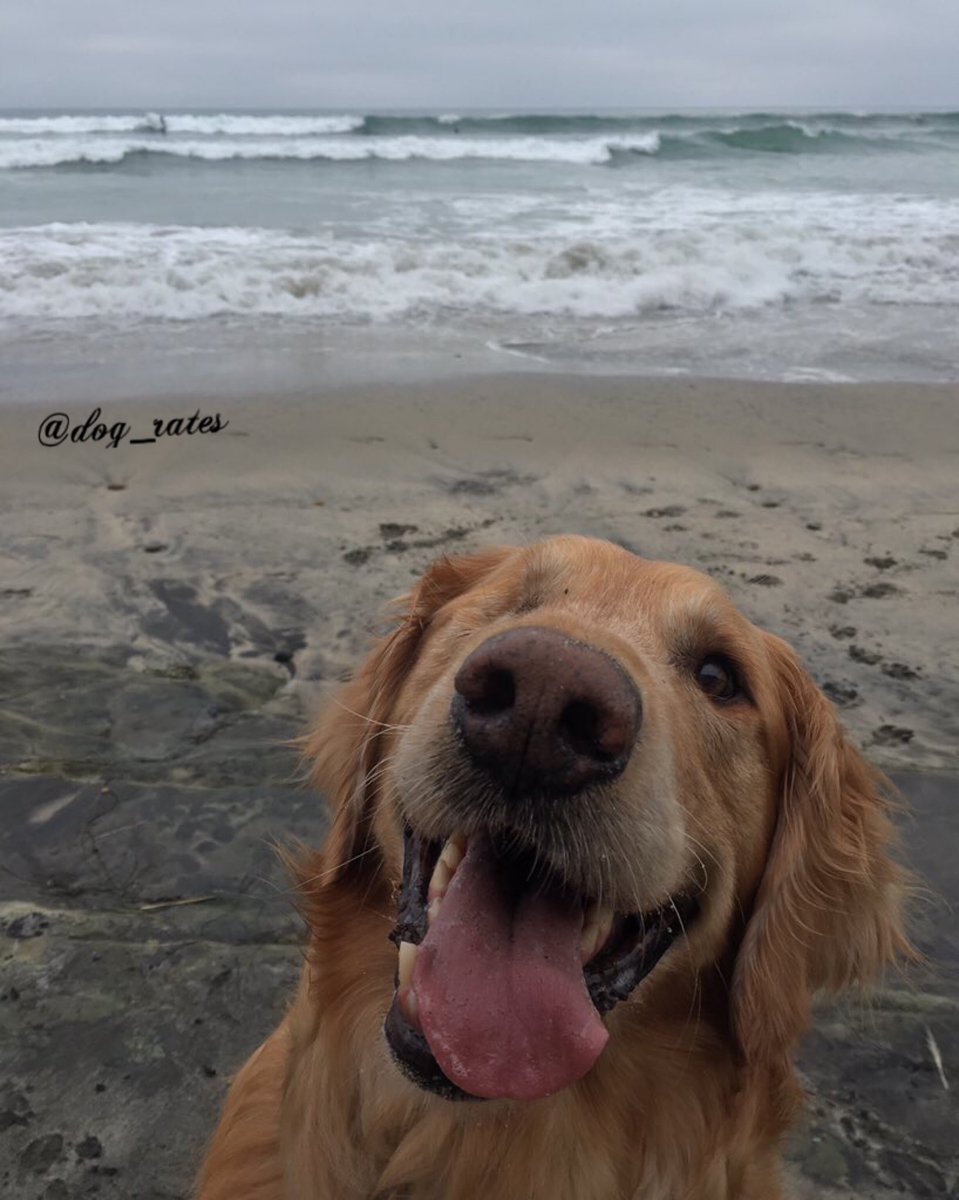

In [234]:
golden_retriever = df_analysis[df_analysis['p1']=='golden_retriever']

random_retriever = random.choice(golden_retriever[golden_retriever.expanded_urls_add.notnull()].expanded_urls_add.values)
Image(url=random_retriever, embed=True, width=260, height=260)

<a id='references'></a>
## VII. - References


- [Writing to a JSOn file](https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/)


- [Tweepy Error Messages](https://www.programcreek.com/python/example/13279/tweepy.TweepError)


- [Flatten Nested JSON files](https://towardsdatascience.com/how-to-flatten-deeply-nested-json-objects-in-non-recursive-elegant-python-55f96533103d)


- [Why are retweets more important?](https://medium.com/@Encore/favorites-vs-retweets-and-why-one-is-more-important-than-the-other-ba12ee20e9ba)